In [534]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statistics
import calendar
import os

In [327]:
os.getcwd()

'/Users/Lajobu/Dev-projects/Data-analysis/2 Renting expenses'

In [524]:
df = pd.read_csv('Data_rent.csv', 
                 sep=';',
                decimal=",")
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [329]:
df.isnull().values.any() # There are not missing values

False

In [330]:
df.head()

Date  Heating  Heating fee  Hot water  Cold Water  Electricity  \
0 2018-09-01     0.00        29.38      53.65       42.67        61.83   
1 2018-10-01    26.31        32.15      72.40       43.60        68.51   
2 2018-11-01   106.13        32.15      78.62       43.32        65.63   
3 2018-12-01    94.08        32.15      88.89       42.06        69.42   
4 2019-01-01   115.20        32.15      83.27       34.99        67.47   

   Internet  Waste  Rent  Parking   TOTAL  Others  
0        47     19  2500        0  2753.5     0.0  
1        47     19  2500        0  2809.0     0.0  
2        47     19  2500      350  3241.9     0.0  
3        47     19  2500      350  3242.6     0.0  
4        47     19  2500      350  3249.1     0.0

# Data description:

- Date: Indicated the month and year when the expense took place
- Heating: This expense is related to the heating of the house, gas consumption, it is variable
- Heating fee: This expense is related to the heating of the house, gas consumption, it is fixed
- Hot water: This expense is related to the hot water consumption, it is variable
- Cold Water:This expense is related to the hot water consumption, it is variable
- Electricity: This expense is related to the electricity consumption, it is variable
- Internet: This expense is related to the internet consumption, it is fix
- Waste: This expense is related to the heating of the house, gas consumption, it is variable
- Rent: This expense is related to the heating of the house, gas consumption, it is variable
- Parking: This expense is related to the heating of the house, gas consumption, it is fixed
- TOTAL: It is the sum of all the previous expenses, by month
- Others: Other expenses, related to the water or electricity counters

# Analysis:

## General:

In [331]:
df[["Heating", "Heating fee", "Hot water", "Cold Water", "Electricity", "Internet", "Waste", "Rent", "Parking", "TOTAL"]].describe().round(2)

Heating  Heating fee  Hot water  Cold Water  Electricity  Internet  \
count    24.00        24.00      24.00       24.00        24.00      24.0   
mean     37.78        32.91      51.21       40.51        65.60      47.0   
std      42.60         1.20      20.30        8.54         9.12       0.0   
min       0.00        29.38      12.57       18.62        36.50      47.0   
25%       0.00        32.15      37.00       36.12        63.48      47.0   
50%      19.61        32.63      51.88       39.38        65.93      47.0   
75%      81.99        34.45      63.89       44.83        69.78      47.0   
max     115.20        34.45      88.89       61.86        78.86      47.0   

       Waste    Rent  Parking    TOTAL  
count  24.00    24.0    24.00    24.00  
mean   30.50  2500.0   214.58  3036.96  
std    20.35     0.0    90.26   144.22  
min    19.00  2500.0     0.00  2753.50  
25%    19.00  2500.0   200.00  2949.35  
50%    19.00  2500.0   200.00  3011.34  
75%    30.50  2500.0   200.00  3162.54  
max    65.00  2500.0   350.00  3249.10

In [397]:
month = df['Date'].dt.month
year = df['Date'].dt.year
Dates = []
for i in range(0, len(month)-1): # -1 because the last month (August 2020), will notn be included
    c = str(calendar.month_name[month[i]]) + '-'  + str(year[i])
    Dates.append(c)

In [ ]:
### Total:

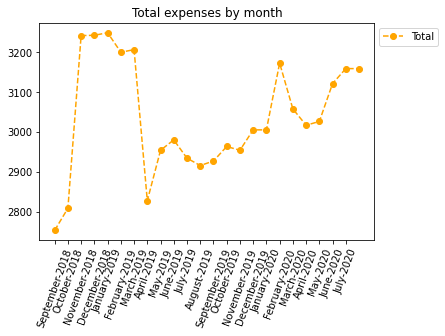

In [477]:
plt.plot(df.TOTAL, color="orange", ls="--", marker="o", ms=6, label="Total") 
plt.title('Total expenses by month')
plt.legend(loc = 'upper left', bbox_to_anchor=(1,1))
plt.xticks(list(range(23)), Dates, rotation= 70)
plt.show()

### Variable expenses:

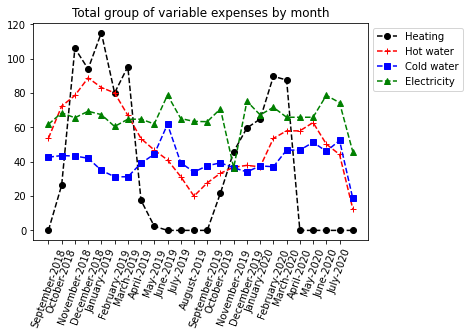

In [478]:
plt.plot(df.Heating, color="black", ls="--", marker="o", ms=6, label="Heating") 
plt.title('Group of variable expenses by month')
plt.plot(df["Hot water"], color="red", ls="--", marker="+", ms=6, label="Hot water")
plt.plot(df["Cold Water"], color="blue", ls="--", marker="s", ms=6, label="Cold water")
plt.plot(df.Electricity, color="green", ls="--", marker="^", ms=6, label="Electricity")
plt.legend(loc = 'upper left', bbox_to_anchor=(1,1)) 
plt.xticks(list(range(23)), Dates, rotation= 70)
plt.show()

In [ ]:
### Fixed expenses:

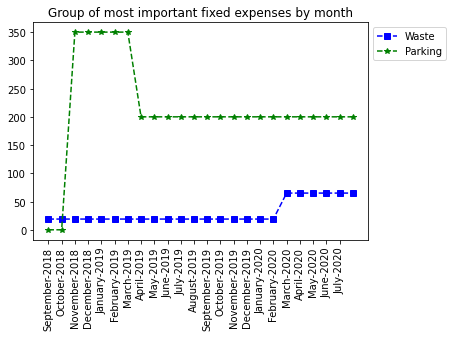

In [479]:
plt.plot(df["Waste"], color="blue", ls="--", marker="s", ms=6, label="Waste")
plt.title('Group of most important fixed expenses by month')
plt.plot(df["Parking"], color="green", ls="--", marker="*", ms=6, label="Parking")
plt.legend(loc = 'upper left', bbox_to_anchor=(1,1)) 
plt.xticks(list(range(23)), Dates, rotation="vertical")
plt.show()

In [ ]:
### Weather in Warsaw (Poland): https://rp5.ru/Weather_archive_in_Warsaw,_Okecie_(airport),_METAR

In [440]:
df1 = pd.read_csv('Weather_Warsaw.csv', 
                       error_bad_lines=False,
                      sep=';',
                      decimal=",",
                      header= 1,
                     comment='#') #There are comments in the beginning of the file, hence this should be indicated
df1['Local time in Warsaw / Okecie (airport)'] = pd.to_datetime(df1['Local time in Warsaw / Okecie (airport)'], format='%d.%m.%Y %H:%M')

In [441]:
weather = df1[['Local time in Warsaw / Okecie (airport)', 'T']].copy()

In [442]:
weather.isnull().any() # There are not missing values

Local time in Warsaw / Okecie (airport)    False
T                                          False
dtype: bool

In [443]:
weather.columns = ['Date', 'Temperature']

In [444]:
weather['Month']= weather.Date.dt.strftime('%b')
weather['Year']= weather.Date.dt.year

In [458]:
weather.sort_values('Date',
                   ascending= True) # To be ordered by date (month and year, ascending)
weather = weather.reset_index(drop=True) # To reset the indexes
#del weather['Date'] # To delete the column date

Temperature Month  Year
0            14.0   Sep  2018
1            14.0   Sep  2018
2            12.0   Sep  2018
3            12.0   Sep  2018
4            12.0   Sep  2018
...           ...   ...   ...
34874        14.0   Aug  2020
34875        13.0   Aug  2020
34876        13.0   Aug  2020
34877        13.0   Aug  2020
34878        13.0   Aug  2020

[34879 rows x 3 columns]

In [459]:
weather = weather[['Month', 'Year', 'Temperature']].copy() # To reorder the columns

In [470]:
avg = []
month = []
year = []
n = []
counter = 0
for i in range(1, len(weather)-1):
    counter += 1
    if weather.Month[i] == weather.Month[i+1] and weather.Year[i] == weather.Year[i+1]:
        n.append(float(weather.Temperature[i-1]))        
    else:
        avg.append(statistics.mean(n))
        month.append(weather.Month[i-11])
        year.append(weather.Year[i-1])
        n = []

In [474]:
weather_avg = pd.DataFrame(list(zip(Dates, avg)), # Dates was created in other point
                           columns =['Dates', 'Temp_avg'])

In [496]:
norm_weather_avg = (weather_avg.Temp_avg-weather_avg.Temp_avg.mean())/weather_avg.Temp_avg.std() 
# To compare the trend of data with different units, firstly it should be normalized
weather_avg_norm = pd.DataFrame(list(zip(Dates, norm_weather_avg)), # Dates was created in other point
                           columns =['Dates', 'Norm_temp_avg'])

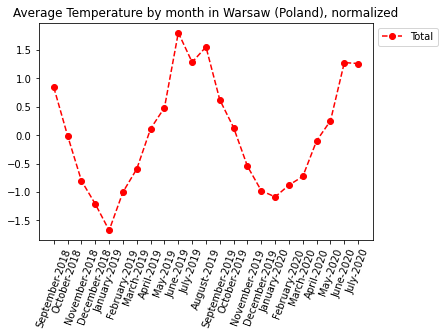

In [499]:
plt.plot(weather_avg_norm.Norm_temp_avg, color="red", ls="--", marker="o", ms=6, label="Total") 
plt.title('Average Temperature by month in Warsaw (Poland), normalized')
plt.legend(loc = 'upper left', bbox_to_anchor=(1,1))
plt.xticks(list(range(23)), Dates, rotation= 70)
plt.show()

In [548]:
Norm_heating = (df.Heating-df.Heating.mean())/df.Heating.std()
Norm_cold_water = (df["Cold Water"]-df["Cold Water"].mean())/df["Cold Water"].std()
Norm_hot_water = (df["Hot water"]-df["Hot water"].mean())/df["Hot water"].std()
weather_avg_norm_vs = pd.DataFrame(list(zip(Dates, norm_weather_avg, Norm_heating, Norm_cold_water, Norm_hot_water)),
                           columns =['Dates', 'Norm_temp_avg', 'Norm_heating', 'Norm_cold_water', 'Norm_hot_water'])

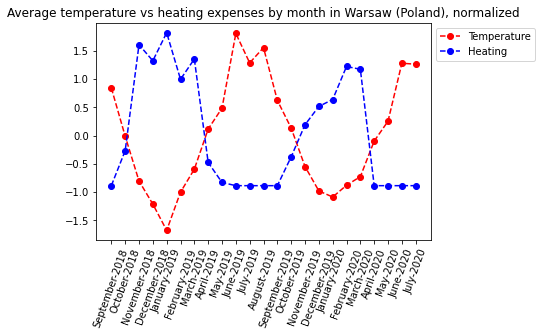

In [549]:
plt.plot(weather_avg_norm_vs.Norm_temp_avg, color="red", ls="--", marker="o", ms=6, label="Temperature") 
plt.plot(weather_avg_norm_vs.Norm_heating, color="blue", ls="--", marker="o", ms=6, label="Heating") 
plt.title('Average temperature vs heating expenses by month in Warsaw (Poland), normalized')
plt.legend(loc = 'upper left', bbox_to_anchor=(1,1))
plt.xticks(list(range(23)), Dates, rotation= 70)
plt.show()

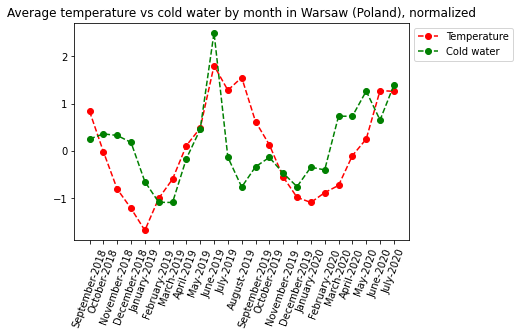

In [556]:
plt.plot(weather_avg_norm_vs.Norm_temp_avg, color="red", ls="--", marker="o", ms=6, label="Temperature") 
plt.plot(weather_avg_norm_vs.Norm_cold_water, color="green", ls="--", marker="o", ms=6, label="Cold water") 
plt.title('Average temperature vs cold water by month in Warsaw (Poland), normalized')
plt.legend(loc = 'upper left', bbox_to_anchor=(1,1))
plt.xticks(list(range(23)), Dates, rotation= 70)
plt.show()

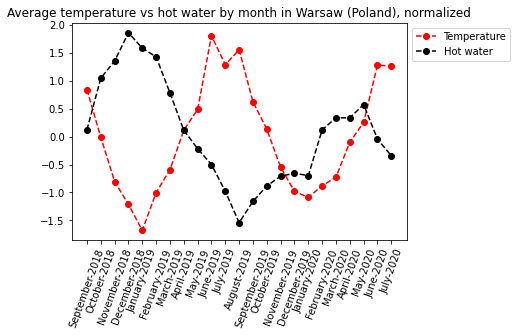

In [557]:
plt.plot(weather_avg_norm_vs.Norm_temp_avg, color="red", ls="--", marker="o", ms=6, label="Temperature") 
plt.plot(weather_avg_norm_vs.Norm_hot_water, color="black", ls="--", marker="o", ms=6, label="Hot water") 
plt.title('Average temperature vs hot water by month in Warsaw (Poland), normalized')
plt.legend(loc = 'upper left', bbox_to_anchor=(1,1))
plt.xticks(list(range(23)), Dates, rotation= 70)
plt.show()

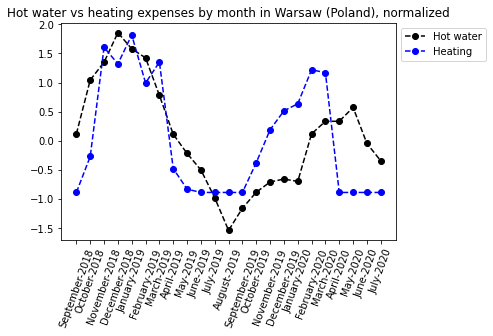

In [562]:
plt.plot(weather_avg_norm_vs.Norm_hot_water, color="black", ls="--", marker="o", ms=6, label="Hot water") 
plt.plot(weather_avg_norm_vs.Norm_heating, color="blue", ls="--", marker="o", ms=6, label="Heating") 
plt.title('Hot water vs heating expenses by month in Warsaw (Poland), normalized')
plt.legend(loc = 'upper left', bbox_to_anchor=(1,1))
plt.xticks(list(range(23)), Dates, rotation= 70)
plt.show()

<AxesSubplot:>

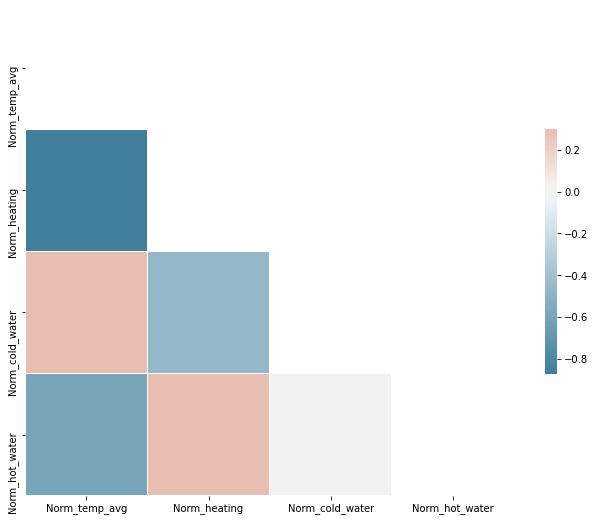

In [553]:
corr = weather_avg_norm_vs.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [554]:
corr

Norm_temp_avg  Norm_heating  Norm_cold_water  Norm_hot_water
Norm_temp_avg         1.000000     -0.872262         0.514609       -0.593617
Norm_heating         -0.872262      1.000000        -0.458010        0.621286
Norm_cold_water       0.514609     -0.458010         1.000000       -0.015452
Norm_hot_water       -0.593617      0.621286        -0.015452        1.000000

## By years:

In [7]:
df_2018 = df[df['Date'].dt.year == 2018] #For 2018
df_2019 = df[df['Date'].dt.year == 2019] #For 2019
df_2020 = df[df['Date'].dt.year == 2020] #For 2020

In [8]:
df_2018[["Heating", "Heating fee", "Hot water", "Cold Water", "Electricity", "Internet", "Waste", "Rent", "Parking", "TOTAL"]].describe().round(2)

Heating  Heating fee  Hot water  Cold Water  Electricity  Internet  \
count     4.00         4.00       4.00        4.00         4.00       4.0   
mean     56.63        31.46      73.39       42.91        66.35      47.0   
std      51.57         1.38      14.81        0.69         3.42       0.0   
min       0.00        29.38      53.65       42.06        61.83      47.0   
25%      19.73        31.46      67.71       42.52        64.68      47.0   
50%      60.20        32.15      75.51       43.00        67.07      47.0   
75%      97.09        32.15      81.19       43.39        68.74      47.0   
max     106.13        32.15      88.89       43.60        69.42      47.0   

       Waste    Rent  Parking    TOTAL  
count    4.0     4.0     4.00     4.00  
mean    19.0  2500.0   175.00  3011.75  
std      0.0     0.0   202.07   267.12  
min     19.0  2500.0     0.00  2753.50  
25%     19.0  2500.0     0.00  2795.12  
50%     19.0  2500.0   175.00  3025.45  
75%     19.0  2500.0   350.00  3242.08  
max     19.0  2500.0   350.00  3242.60

In [9]:
df_2019[["Heating", "Heating fee", "Hot water", "Cold Water", "Electricity", "Internet", "Waste", "Rent", "Parking", "TOTAL"]].describe().round(2)

Heating  Heating fee  Hot water  Cold Water  Electricity  Internet  \
count    12.00        12.00      12.00       12.00        12.00      12.0   
mean     36.49        32.51      46.57       38.66        64.43      47.0   
std      41.84         0.22      20.48        8.23        10.35       0.0   
min       0.00        32.14      19.98       31.22        36.50      47.0   
25%       0.00        32.51      32.79       34.06        63.03      47.0   
50%      19.61        32.63      39.47       37.08        64.80      47.0   
75%      64.80        32.63      56.88       39.37        68.31      47.0   
max     115.20        32.63      83.27       61.86        78.86      47.0   

       Waste    Rent  Parking    TOTAL  
count   12.0    12.0    12.00    12.00  
mean    19.0  2500.0   237.50  3010.02  
std      0.0     0.0    67.84   133.39  
min     19.0  2500.0   200.00  2827.92  
25%     19.0  2500.0   200.00  2932.72  
50%     19.0  2500.0   200.00  2959.10  
75%     19.0  2500.0   237.50  3054.18  
max     19.0  2500.0   350.00  3249.10

In [10]:
df_2020[["Heating", "Heating fee", "Hot water", "Cold Water", "Electricity", "Internet", "Waste", "Rent", "Parking", "TOTAL"]].describe().round(2)

Heating  Heating fee  Hot water  Cold Water  Electricity  Internet  \
count     8.00         8.00       8.00        8.00         8.00       8.0   
mean     30.29        34.22      47.08       42.09        79.47      47.0   
std      42.45         0.64      16.21       11.00        40.99       0.0   
min       0.00        32.63      12.57       18.62        45.84      47.0   
25%       0.00        34.45      42.44       37.47        65.93      47.0   
50%       0.00        34.45      51.95       46.44        66.62      47.0   
75%      70.58        34.45      58.01       47.92        72.40      47.0   
max      89.78        34.45      62.84       52.40       178.69      47.0   

       Waste    Rent  Parking    TOTAL  
count   8.00     8.0      8.0     8.00  
mean   53.50  2500.0    200.0  3089.97  
std    21.29     0.0      0.0    70.61  
min    19.00  2500.0    200.0  3005.47  
25%    53.50  2500.0    200.0  3024.20  
50%    65.00  2500.0    200.0  3089.77  
75%    65.00  2500.0    200.0  3159.13  
max    65.00  2500.0    200.0  3172.77

## By months:

In [124]:
mon_heating = []
mon_hot_water = []
mon_cold_water = []
mon_electricity = []
mon_total = []

for i in range(1, 13):
    mon_heating.append(np.mean(df["Heating"][df['Date'].dt.month == i]))
    mon_hot_water.append(np.mean(df["Hot water"][df['Date'].dt.month == i]))
    mon_cold_water.append(np.mean(df["Cold Water"][df['Date'].dt.month == i]))
    mon_electricity.append(np.mean(df["Electricity"][df['Date'].dt.month == i]))
    mon_total.append(np.mean(df["TOTAL"][df['Date'].dt.month == i]))

months_name = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

mon_heating = pd.DataFrame({'Month name':months_name,'Heating avg':mon_heating})
mon_hot_water = pd.DataFrame({'Month name':months_name,'Hot water avg':mon_hot_water})
mon_cold_water = pd.DataFrame({'Month name':months_name,'Cold water avg':mon_cold_water})
mon_electricity = pd.DataFrame({'Month name':months_name,'Electricity avg':mon_electricity})
mon_total = pd.DataFrame({'Month name':months_name,'Total avg':mon_total})